#### 07 - Extracting Information from Text

Resource: https://www.nltk.org/book/ch07.html

In [43]:
import nltk

In [44]:
def ie_preprocess(document):
  sentence = nltk.sent_tokenize(document)
  tokens = [nltk.word_tokenize(sent) for sent in sentence]
  tagged_tokens = [nltk.pos_tag(token) for token in tokens]
  return tagged_tokens

In [45]:
sentence = "The curious cat sat on the warm, sunny windowsill."
tagged_sentences = ie_preprocess(sentence)
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)

In [46]:
for tagged_sentence in tagged_sentences:
  result = cp.parse(tagged_sentence)
  print(result)
  result.draw()

(S
  (NP The/DT curious/JJ cat/NN)
  sat/VBD
  on/IN
  (NP the/DT warm/NN)
  ,/,
  (NP sunny/JJ windowsill/NN)
  ./.)


In [47]:
grammar = r"""
  NP: {<DT|PP\$>?<JJ>*<NN>}   # chunk determiner/possessive, adjectives and noun
      {<NNP>+}                # chunk sequences of proper nouns
"""
sentences = "The curious cat sat on John's beautiful garden in New York City."
tagged_sentences = ie_preprocess(sentences)
cp = nltk.RegexpParser(grammar)

In [48]:
for tagged_sentence in tagged_sentences:
  result = cp.parse(tagged_sentence)
  print(result)
  result.draw()

(S
  (NP The/DT curious/JJ cat/NN)
  sat/VBD
  on/IN
  (NP John/NNP)
  's/POS
  (NP beautiful/JJ garden/NN)
  in/IN
  (NP New/NNP York/NNP City/NNP)
  ./.)


In [49]:
cp = nltk.RegexpParser('CHUNK: {<V.*> <TO> <V.*>}')  # Chunk verb followed by "to" and another verb
brown = nltk.corpus.brown
i = 0  # Initialize a counter

# Parse sentences in the Brown corpus
for sent in brown.tagged_sents():
    tree = cp.parse(sent)
    for subtree in tree.subtrees():
        if subtree.label() == 'CHUNK':  # Check if the subtree is a chunk
            print(subtree)  # Print the chunk
            i += 1
            if i >= 10:  # Stop after 10 chunks
                break
    if i >= 10:
        break

(CHUNK combined/VBN to/TO achieve/VB)
(CHUNK continue/VB to/TO place/VB)
(CHUNK serve/VB to/TO protect/VB)
(CHUNK wanted/VBD to/TO wait/VB)
(CHUNK allowed/VBN to/TO place/VB)
(CHUNK expected/VBN to/TO become/VB)
(CHUNK expected/VBN to/TO approve/VB)
(CHUNK expected/VBN to/TO make/VB)
(CHUNK intends/VBZ to/TO make/VB)
(CHUNK seek/VB to/TO set/VB)


In [50]:
text = '''
he PRP B-NP
accepted VBD B-VP
the DT B-NP
position NN I-NP
of IN B-PP
vice NN B-NP
chairman NN I-NP
of IN B-PP
Carlyle NNP B-NP
Group NNP I-NP
, , O
a DT B-NP
merchant NN I-NP
banking NN I-NP
concern NN I-NP
. . O
'''
nltk.chunk.conllstr2tree(text, chunk_types=['NP']).draw()
print(nltk.chunk.conllstr2tree(text, chunk_types=['NP'])[:10])

[Tree('NP', [('he', 'PRP')]), ('accepted', 'VBD'), Tree('NP', [('the', 'DT'), ('position', 'NN')]), ('of', 'IN'), Tree('NP', [('vice', 'NN'), ('chairman', 'NN')]), ('of', 'IN'), Tree('NP', [('Carlyle', 'NNP'), ('Group', 'NNP')]), (',', ','), Tree('NP', [('a', 'DT'), ('merchant', 'NN'), ('banking', 'NN'), ('concern', 'NN')]), ('.', '.')]


In [51]:
print(nltk.corpus.conll2000.chunked_sents('train.txt', chunk_types=['NP'])[30])

(S
  (NP The/DT dollar/NN)
  posted/VBD
  (NP gains/NNS)
  in/IN
  (NP quiet/JJ trading/NN)
  as/IN
  (NP concerns/NNS)
  about/IN
  (NP equities/NNS)
  abated/VBN
  ./.)


In [52]:
from nltk.corpus import conll2000
cp = nltk.RegexpParser("")
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
print(cp.accuracy(test_sents))

ChunkParse score:
    IOB Accuracy:  43.4%%
    Precision:      0.0%%
    Recall:         0.0%%
    F-Measure:      0.0%%


In [53]:
grammar = r"NP: {<[CDJNP].*>+}"
cp = nltk.RegexpParser(grammar)
print(cp.accuracy(test_sents))

ChunkParse score:
    IOB Accuracy:  87.7%%
    Precision:     70.6%%
    Recall:        67.8%%
    F-Measure:     69.2%%


In [54]:
class UnigramChunker(nltk.ChunkParserI):
  def __init__(self, train_sents):
    train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)]
                  for sent in train_sents]
    self.tagger = nltk.UnigramTagger(train_data)

  def parse(self, sentence):
    pos_tags = [pos for (word,pos) in sentence]
    tagged_pos_tags = self.tagger.tag(pos_tags)
    chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
    conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                  in zip(sentence, chunktags)]
    return nltk.chunk.conlltags2tree(conlltags)

In [55]:
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])
train_sents = conll2000.chunked_sents('train.txt', chunk_types=['NP'])
unigram_chunker = UnigramChunker(train_sents)
print(unigram_chunker.accuracy(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


In [56]:
postags = sorted(set(pos for sent in train_sents
                      for (word,pos) in sent.leaves()))
unigram_chunker.tagger.tag(postags)[:50:5]

[('#', 'B-NP'),
 (',', 'O'),
 ('DT', 'B-NP'),
 ('JJR', 'B-NP'),
 ('NNPS', 'I-NP'),
 ('PRP$', 'B-NP'),
 ('SYM', 'O'),
 ('VBG', 'O'),
 ('WP', 'B-NP')]

In [57]:
class BigramChunker(nltk.ChunkParserI):
  def __init__(self, train_sents):
    train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)]
                  for sent in train_sents]
    self.tagger = nltk.UnigramTagger(train_data)

  def parse(self, sentence):
    pos_tags = [pos for (word,pos) in sentence]
    tagged_pos_tags = self.tagger.tag(pos_tags)
    chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
    conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                  in zip(sentence, chunktags)]
    return nltk.chunk.conlltags2tree(conlltags)

In [58]:
bigram_checker = BigramChunker(train_sents)
print(bigram_checker.accuracy(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


In [59]:
grammar = r"""
  NP: {<DT|JJ|NN.*>+}          # Chunk sequences of DT, JJ, NN
  PP: {<IN><NP>}               # Chunk prepositions followed by NP
  VP: {<VB.*><NP|PP|CLAUSE>+$} # Chunk verbs and their arguments
  CLAUSE: {<NP><VP>}           # Chunk NP, VP
  """
cp = nltk.RegexpParser(grammar)
sentence = [("Mary", "NN"), ("saw", "VBD"), ("the", "DT"), ("cat", "NN"),
    ("sit", "VB"), ("on", "IN"), ("the", "DT"), ("mat", "NN")]
print(cp.parse(sentence))

(S
  (NP Mary/NN)
  saw/VBD
  (CLAUSE
    (NP the/DT cat/NN)
    (VP sit/VB (PP on/IN (NP the/DT mat/NN)))))


In [60]:
sentence = [("John", "NNP"), ("thinks", "VBZ"), ("Mary", "NN"),
    ("saw", "VBD"), ("the", "DT"), ("cat", "NN"), ("sit", "VB"),
    ("on", "IN"), ("the", "DT"), ("mat", "NN")]
print(cp.parse(sentence))

(S
  (NP John/NNP)
  thinks/VBZ
  (NP Mary/NN)
  saw/VBD
  (CLAUSE
    (NP the/DT cat/NN)
    (VP sit/VB (PP on/IN (NP the/DT mat/NN)))))


In [61]:
cp = nltk.RegexpParser(grammar, loop=2)
print(cp.parse(sentence))

(S
  (NP John/NNP)
  thinks/VBZ
  (CLAUSE
    (NP Mary/NN)
    (VP
      saw/VBD
      (CLAUSE
        (NP the/DT cat/NN)
        (VP sit/VB (PP on/IN (NP the/DT mat/NN)))))))


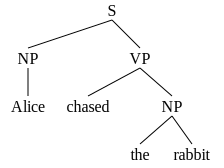

In [62]:
tree1 = nltk.Tree('NP', ['Alice'])
tree2 = nltk.Tree('NP', ['the', 'rabbit'])
tree3 = nltk.Tree('VP', ['chased', tree2])
tree4 = nltk.Tree('S', [tree1, tree3])
tree4

In [63]:
print(tree4[1])

(VP chased (NP the rabbit))


In [64]:
tree4[1].label()

'VP'

In [65]:
tree4.leaves()

['Alice', 'chased', 'the', 'rabbit']

In [66]:
tree4[1][1][1]

'rabbit'

In [67]:
print(tree4)
tree4.draw()

(S (NP Alice) (VP chased (NP the rabbit)))


In [68]:
# Define the traverse function
def traverse(t):
    try:
        t.label()  # Check if the node is a subtree
    except AttributeError:
        print(t, end=" ")  # Leaf node, print the content
    else:
        print('(', t.label(), end=" ")  # Print the label of the subtree
        for child in t:
            traverse(child)  # Recursively visit the children
        print(')', end=" ")  # Close the current subtree

traverse(tree4)

( S ( NP Alice ) ( VP chased ( NP the rabbit ) ) ) 

In [69]:
import re
IN = re.compile(r'.*\bin\b(?!\b.+ing)')
for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
  for rel in nltk.sem.extract_rels('ORG', 'LOC', doc,
                                corpus='ieer', pattern = IN):
    print(nltk.sem.rtuple(rel))

[ORG: 'WHYY'] 'in' [LOC: 'Philadelphia']
[ORG: 'McGlashan &AMP; Sarrail'] 'firm in' [LOC: 'San Mateo']
[ORG: 'Freedom Forum'] 'in' [LOC: 'Arlington']
[ORG: 'Brookings Institution'] ', the research group in' [LOC: 'Washington']
[ORG: 'Idealab'] ', a self-described business incubator based in' [LOC: 'Los Angeles']
[ORG: 'Open Text'] ', based in' [LOC: 'Waterloo']
[ORG: 'WGBH'] 'in' [LOC: 'Boston']
[ORG: 'Bastille Opera'] 'in' [LOC: 'Paris']
[ORG: 'Omnicom'] 'in' [LOC: 'New York']
[ORG: 'DDB Needham'] 'in' [LOC: 'New York']
[ORG: 'Kaplan Thaler Group'] 'in' [LOC: 'New York']
[ORG: 'BBDO South'] 'in' [LOC: 'Atlanta']
[ORG: 'Georgia-Pacific'] 'in' [LOC: 'Atlanta']


In [70]:
from nltk.corpus import conll2002
vnv = """
(
is/V|    # 3rd sing present and
was/V|   # past forms of the verb zijn ('be')
werd/V|  # and also present
wordt/V  # past of worden ('become)
)
.*       # followed by anything
van/Prep # followed by van ('of')
"""
VAN = re.compile(vnv, re.VERBOSE)
for doc in conll2002.chunked_sents('ned.train'):
    for rel in nltk.sem.extract_rels('PER', 'ORG', doc,
                                  corpus='conll2002', pattern=VAN):
      print(nltk.sem.clause(rel, relsym="VAN"))



VAN("cornet_d'elzius", 'buitenlandse_handel')
VAN('johan_rottiers', 'kardinaal_van_roey_instituut')
VAN('annie_lennox', 'eurythmics')
